# **Final Code and Done to Submit**

Enter the path of the video file: /content/drive/MyDrive/Movie on 08-02-2025 at 6.05 PM.mov

===== EXTRACTING AUDIO =====
Error: ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --e

  if event.key is 'enter':



MoviePy - Writing audio in analysis_output/audio/Movie on 08-02-2025 at 6.05 PM_audio.wav


MoviePy - Done.
Audio extracted successfully using moviepy: analysis_output/audio/Movie on 08-02-2025 at 6.05 PM_audio.wav
Audio extracted successfully to: analysis_output/audio/Movie on 08-02-2025 at 6.05 PM_audio.wav


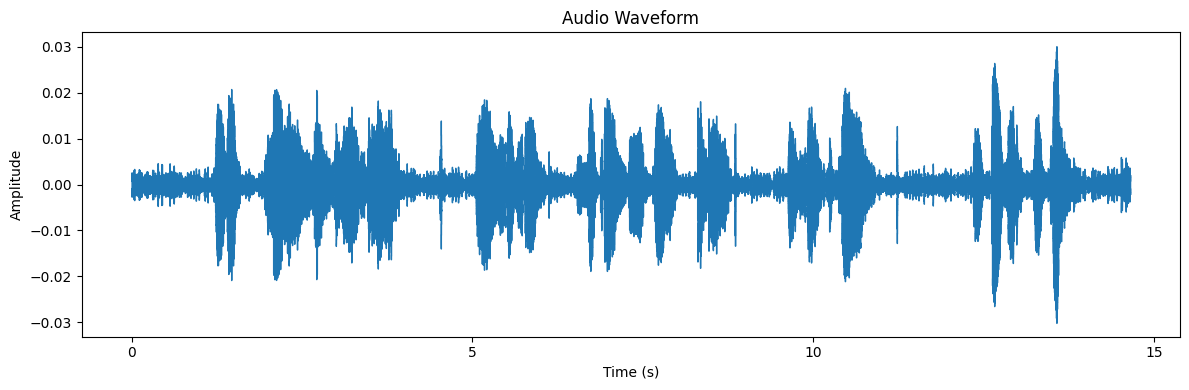

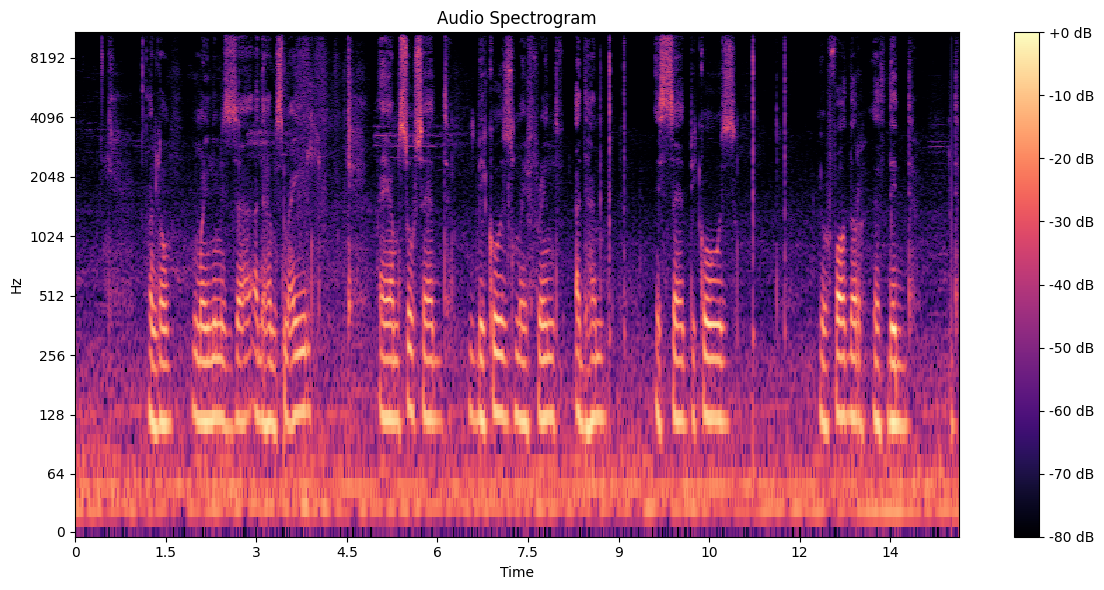


===== ANALYZING VIDEO FRAMES =====
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━

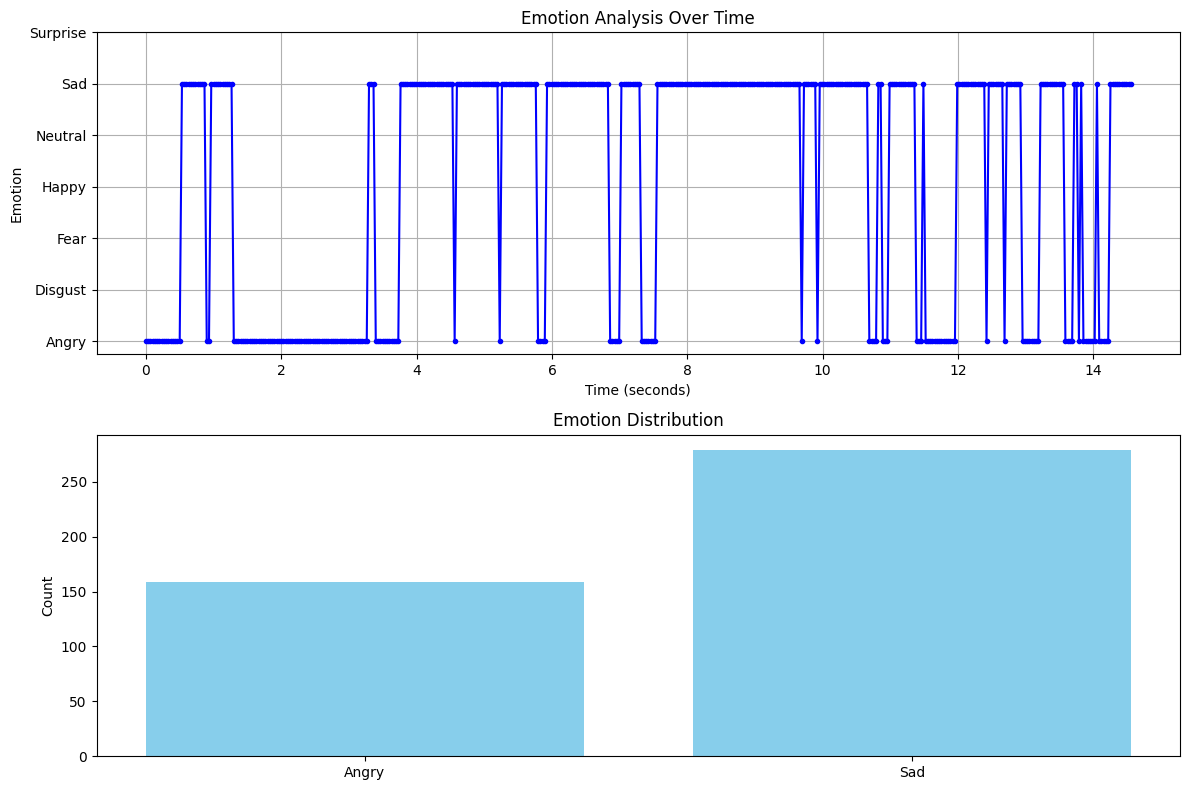


===== EMOTION ANALYSIS SUMMARY =====
Video Duration: 14.55 seconds
Total Frames Analyzed: 438
Dominant Emotion: Sad (63.7%)

Emotion Distribution:
  - Angry: 36.3% (5.29 seconds)
  - Sad: 63.7% (9.26 seconds)

Emotion Transitions: 43
Transition Rate: 177.30 changes per minute

All analysis output saved to folder: analysis_output


In [ ]:
import numpy as np
import cv2
import os
import subprocess
import hashlib
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from collections import Counter

# Load the trained model
model = load_model("/content/drive/MyDrive/emotion_model.h5")

# Emotion names
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

def predict_emotion(image_path):
    # Load image and convert to grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Error: Image not found")
        return None

    # Resize to fit the model input (48x48)
    img = cv2.resize(img, (48, 48))
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = img.reshape(1, 48, 48, 1)  # Reshape for model input

    # Predict emotion
    prediction = model.predict(img)
    emotion_index = np.argmax(prediction)  # Get the index of the highest prediction
    emotion = emotion_labels[emotion_index]  # Get the emotion label
    return emotion

def calculate_hash(image_path):
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

def extract_audio(video_path, output_folder):
    """
    Extract audio (wav file) from the video file and save it
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Generate output audio file path
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    audio_output_path = os.path.join(output_folder, f"{video_name}_audio.wav")

    try:
        # Using FFmpeg to extract audio in WAV format
        command = [
            "ffmpeg",
            "-i", video_path,
            "-q:a", "0",
            "-map", "a",
            audio_output_path
        ]

        # Execute the command
        process = subprocess.run(
            command,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE
        )

        if process.returncode != 0:
            print("Warning: FFmpeg process returned non-zero code")
            print(f"Error: {process.stderr.decode()}")

            # Try alternative method using moviepy if available
            try:
                from moviepy.editor import VideoFileClip
                video = VideoFileClip(video_path)
                video.audio.write_audiofile(audio_output_path)
                print(f"Audio extracted successfully using moviepy: {audio_output_path}")
                return audio_output_path
            except ImportError:
                print("Failed to extract audio. Please install moviepy or check ffmpeg installation.")
                return None
        else:
            print(f"Audio extracted successfully: {audio_output_path}")
            return audio_output_path

    except Exception as e:
        print(f"Error extracting audio: {str(e)}")
        return None

def extract_frames(video_path, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    hashes = set()
    emotions = []
    timestamps = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_path = os.path.join(output_folder, f"frame_{frame_count:05d}.jpg")
        cv2.imwrite(frame_path, frame)

        # Check for duplicates
        img_hash = calculate_hash(frame_path)
        if img_hash in hashes:
            os.remove(frame_path)  # Remove duplicate image
        else:
            hashes.add(img_hash)
            # Predict emotion for the frame
            emotion = predict_emotion(frame_path)
            if emotion:
                emotions.append(emotion)
                timestamps.append(frame_count / cap.get(cv2.CAP_PROP_FPS))  # Convert frame count to seconds
            frame_count += 1

    cap.release()
    print(f"Extracted {frame_count} unique frames to {output_folder}")
    return emotions, timestamps

def analyze_emotions(emotions, timestamps):
    """
    Analyze the emotions detected in the video and return statistics
    """
    # Count frequency of each emotion
    emotion_counts = Counter(emotions)
    total_frames = len(emotions)

    # Calculate percentage of each emotion
    emotion_percentages = {emotion: (count / total_frames) * 100 for emotion, count in emotion_counts.items()}

    # Find the dominant emotion
    dominant_emotion = emotion_counts.most_common(1)[0][0]

    # Calculate duration of each emotion
    emotion_durations = {}
    current_emotion = emotions[0]
    start_time = timestamps[0]

    for i in range(1, len(emotions)):
        if emotions[i] != current_emotion or i == len(emotions) - 1:
            duration = timestamps[i] - start_time
            if current_emotion in emotion_durations:
                emotion_durations[current_emotion] += duration
            else:
                emotion_durations[current_emotion] = duration

            current_emotion = emotions[i]
            start_time = timestamps[i]

    # Handle the last emotion segment
    if i == len(emotions) - 1 and current_emotion not in emotion_durations:
        emotion_durations[current_emotion] = timestamps[-1] - start_time

    # Calculate emotional transitions
    transitions = 0
    for i in range(1, len(emotions)):
        if emotions[i] != emotions[i-1]:
            transitions += 1

    # Create summary of statistics
    video_duration = timestamps[-1] - timestamps[0]
    emotion_stats = {
        "total_frames": total_frames,
        "video_duration_seconds": video_duration,
        "dominant_emotion": dominant_emotion,
        "emotion_counts": dict(emotion_counts),
        "emotion_percentages": emotion_percentages,
        "emotion_durations_seconds": emotion_durations,
        "emotion_transitions": transitions,
        "transition_rate_per_minute": (transitions / video_duration) * 60 if video_duration > 0 else 0
    }

    return emotion_stats

def plot_emotions_over_time(emotions, timestamps):
    # Convert emotions to numerical values for plotting
    emotion_to_num = {emotion: i for i, emotion in enumerate(emotion_labels)}
    emotion_nums = [emotion_to_num[e] for e in emotions]

    plt.figure(figsize=(12, 8))

    # Plot emotions over time
    plt.subplot(2, 1, 1)
    plt.plot(timestamps, emotion_nums, marker='o', linestyle='-', color='b', markersize=3)
    plt.yticks(range(len(emotion_labels)), emotion_labels)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Emotion')
    plt.title('Emotion Analysis Over Time')
    plt.grid(True)

    # Plot emotion distribution
    emotion_counts = Counter(emotions)
    plt.subplot(2, 1, 2)
    emotions_list = list(emotion_counts.keys())
    counts = list(emotion_counts.values())
    plt.bar(emotions_list, counts, color='skyblue')
    plt.ylabel('Count')
    plt.title('Emotion Distribution')

    plt.tight_layout()
    plt.show()

    return emotion_counts

def visualize_audio_waveform(audio_path):
    """
    Visualize the audio waveform
    """
    try:
        import librosa
        import librosa.display

        # Load audio file
        y, sr = librosa.load(audio_path)

        # Plot waveform
        plt.figure(figsize=(12, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title('Audio Waveform')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.tight_layout()
        plt.show()

        # Optionally plot spectrogram
        plt.figure(figsize=(12, 6))
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Audio Spectrogram')
        plt.tight_layout()
        plt.show()

        return True
    except ImportError:
        print("Warning: librosa not installed. Cannot visualize audio waveform.")
        print("Install librosa with: pip install librosa")
        return False
    except Exception as e:
        print(f"Error visualizing audio: {str(e)}")
        return False

if __name__ == "__main__":
    video_file = input("Enter the path of the video file: ")  # User input for video file path
    output_folder = "analysis_output"
    frames_output_folder = os.path.join(output_folder, "frames")
    audio_output_folder = os.path.join(output_folder, "audio")

    # Create main output folder
    os.makedirs(output_folder, exist_ok=True)

    # Extract audio from video
    print("\n===== EXTRACTING AUDIO =====")
    audio_path = extract_audio(video_file, audio_output_folder)

    if audio_path:
        print(f"Audio extracted successfully to: {audio_path}")

        # Optional: Visualize audio waveform if librosa is installed
        visualize_audio_waveform(audio_path)
    else:
        print("Audio extraction failed or skipped.")

    # Extract frames and predict emotions
    print("\n===== ANALYZING VIDEO FRAMES =====")
    emotions, timestamps = extract_frames(video_file, frames_output_folder)

    # Plot emotions over time and get emotion counts
    emotion_counts = plot_emotions_over_time(emotions, timestamps)

    # Analyze emotions and print statistics
    emotion_stats = analyze_emotions(emotions, timestamps)

    print("\n===== EMOTION ANALYSIS SUMMARY =====")
    print(f"Video Duration: {emotion_stats['video_duration_seconds']:.2f} seconds")
    print(f"Total Frames Analyzed: {emotion_stats['total_frames']}")
    print(f"Dominant Emotion: {emotion_stats['dominant_emotion']} ({emotion_stats['emotion_percentages'][emotion_stats['dominant_emotion']]:.1f}%)")

    print("\nEmotion Distribution:")
    for emotion in emotion_labels:
        if emotion in emotion_stats['emotion_percentages']:
            percentage = emotion_stats['emotion_percentages'][emotion]
            duration = emotion_stats['emotion_durations_seconds'].get(emotion, 0)
            print(f"  - {emotion}: {percentage:.1f}% ({duration:.2f} seconds)")

    print(f"\nEmotion Transitions: {emotion_stats['emotion_transitions']}")
    print(f"Transition Rate: {emotion_stats['transition_rate_per_minute']:.2f} changes per minute")

    print(f"\nAll analysis output saved to folder: {output_folder}")